In [58]:
import numpy as np
import pandas as pd
from scipy import stats
import statsmodels
import statsmodels.formula.api as smf

import matplotlib.pyplot as plt
import seaborn as sns

## Part 1
The location quotients are given for NY (population 1) and LA (population2) in the NY Data and LA Data worksheets repectively. The location quotient (LOC_QUOTIENT) represents the ratio of an occupation’s share of employment in a given area to that occupation’s share of employment in the U.S. as a whole. For example, an occupation that makes up 10 percent of employment in a specific metropolitan area compared with 2 percent of U.S. employment would have a location quotient of 5 for the area in question.

1.Use the random sampling method to draw a random sample of 200 from the NY LOC QUOTIENTs and a random sample of size 200 from the LA LOC QUOTIENTs.

In [79]:
df_ny=pd.read_excel('Module 6 Project_US Occupations.xlsx',sheet_name='NY Data')
df_la=pd.read_excel('Module 6 Project_US Occupations.xlsx',sheet_name='LA Data')

In [80]:
df_ny.head()

,NY Metropolitan:,OCC_TITLE,TOT_EMP,EMP_PRSE,JOBS_1000,LOC QUOTIENT,H_MEAN,A_MEAN,MEAN_PRSE,H_MEDIAN,A_MEDIAN
0,"New York-Newark-Jersey City, NY-NJ-PA",Chief Executives,8640,4.1,0.929,0.63,119.55,248670,2,#,#
1,"New York-Newark-Jersey City, NY-NJ-PA",General and Operations Managers,150300,1.4,16.157,1.04,80.04,166470,0.9,68.01,141460
2,"New York-Newark-Jersey City, NY-NJ-PA",Legislators,3060,6.3,0.329,0.91,*,63050,4.9,*,64050
3,"New York-Newark-Jersey City, NY-NJ-PA",Advertising and Promotions Managers,5940,5.9,0.639,3.24,83.98,174680,2.4,75.9,157870
4,"New York-Newark-Jersey City, NY-NJ-PA",Marketing Managers,23200,3.1,2.493,1.62,92.53,192460,1.1,84.87,176520


In [46]:
df_la.head()

,LA Metropolitan,OCC_TITLE,TOT_EMP,EMP_PRSE,JOBS_1000,LOC QUOTIENT,H_MEAN,A_MEAN,MEAN_PRSE,H_MEDIAN,A_MEDIAN
0,"Los Angeles-Long Beach-Anaheim, CA",Chief Executives,10620,2.8,1.756,1.19,113.81,236730,1.5,#,#
1,"Los Angeles-Long Beach-Anaheim, CA",General and Operations Managers,96170,1.8,15.903,1.02,67.77,140970,1,55.58,115600
2,"Los Angeles-Long Beach-Anaheim, CA",Legislators,680,6.5,0.112,0.31,118.365,72510,4.2,*,63150
3,"Los Angeles-Long Beach-Anaheim, CA",Marketing Managers,10440,3.4,1.727,1.12,73.08,152000,1.2,67.03,139430
4,"Los Angeles-Long Beach-Anaheim, CA",Sales Managers,27920,2.8,4.618,1.77,63.38,131830,1.6,54.15,112640


In [98]:
df_ny['LOC QUOTIENT'].describe()

count    715.000000
mean       1.007357
std        0.682452
min        0.020000
25%        0.560000
50%        0.880000
75%        1.270000
max        5.450000
Name: LOC QUOTIENT, dtype: float64

In [82]:
ny200=np.random.choice(df_ny['LOC QUOTIENT'],size=200)
la200=np.random.choice(df_la['LOC QUOTIENT'],size=200)

In [155]:
df_ny200=pd.DataFrame({'Sample of 200 NY - LOC QUOTIENT':ny200},
                     index=range(200))
df_ny200.head(10)

,Sample of 200 NY - LOC QUOTIENT
0,2.55
1,0.26
2,0.82
3,1.73
4,0.48
5,0.42
6,0.90
7,0.79
8,0.13
9,1.17


In [156]:
df_la200=pd.DataFrame({'Sample of 200 LA - LOC QUOTIENT':la200},
                     index=range(200))
df_la200.head(10)

,Sample of 200 LA - LOC QUOTIENT
0,1.21
1,1.05
2,1.21
3,0.65
4,0.21
5,0.80
6,0.95
7,1.28
8,1.04
9,0.90


2.Standardize both sets samples of LOC QUOTIENTs and put the standardized values (𝒛) in a new data file.

In [158]:
ny200_z=stats.zscore(ny200)
la200_z=stats.zscore(la200)

ny200_z=pd.DataFrame({'NY Sample Standardized (z)':ny200_z})
la200_z=pd.DataFrame({'LA Sample Standardized (z)':la200_z})
ny200_z.head(10)

,NY Sample Standardized (z)
0,2.150532
1,-0.913533
2,-0.164242
3,1.053356
4,-0.619168
5,-0.699450
6,-0.057200
7,-0.204382
8,-1.087475
9,0.304065


In [159]:
la200_z.head(10)

,LA Sample Standardized (z)
0,0.039457
1,-0.080679
2,0.039457
3,-0.381021
4,-0.711396
5,-0.268393
6,-0.155765
7,0.092017
8,-0.088188
9,-0.193307


3.For each of the two sets of LOC QUOTIENTs values, partition the standardized values into seven groups according to the following group specifications:           
Group 1: Standardized values that are less than or equal to – 0.5 (that is, 𝒛 ≤ −𝟎.𝟓)                    
Group 2: Standardized values satisfy: −𝟎.𝟓 < 𝒛 ≤ 𝟎                 
Group 3: Standardized values satisfy: 𝟎 < 𝒛 ≤ 𝟏                 
Group 4: Standardized values satisfy: 𝟏 < 𝒛 ≤ 𝟐               
Group 5: Standardized values satisfy: 𝟐 < 𝒛 ≤ 𝟑                 
Group 6: Standardized values satisfy: 𝟑 < 𝒛 ≤ 𝟒               
Group 7: Standardized values satisfy: 𝒛 > 𝟒                 

In [84]:
ny200_z_1=ny200_z[ny200_z['NY Sample Standardized (z)'] <= -0.5]
ny200_z_2=ny200_z[(ny200_z['NY Sample Standardized (z)'] > -0.5) & 
                  (ny200_z['NY Sample Standardized (z)'] <= 0) ]
ny200_z_3=ny200_z[(ny200_z['NY Sample Standardized (z)'] > 0) & 
                  (ny200_z['NY Sample Standardized (z)'] <= 1) ]
ny200_z_4=ny200_z[(ny200_z['NY Sample Standardized (z)'] > 1) & 
                  (ny200_z['NY Sample Standardized (z)'] <= 2) ]
ny200_z_5=ny200_z[(ny200_z['NY Sample Standardized (z)'] > 2) & 
                  (ny200_z['NY Sample Standardized (z)'] <= 3) ]
ny200_z_6=ny200_z[(ny200_z['NY Sample Standardized (z)'] > 3) & 
                  (ny200_z['NY Sample Standardized (z)'] <= 4) ]
ny200_z_7=ny200_z[ny200_z['NY Sample Standardized (z)'] > 4]

In [85]:
la200_z_1=la200_z[la200_z['LA Sample Standardized (z)'] <= -0.5]
la200_z_2=la200_z[(la200_z['LA Sample Standardized (z)'] > -0.5) & 
                  (la200_z['LA Sample Standardized (z)'] <= 0) ]
la200_z_3=la200_z[(la200_z['LA Sample Standardized (z)'] > 0) & 
                  (la200_z['LA Sample Standardized (z)'] <= 1) ]
la200_z_4=la200_z[(la200_z['LA Sample Standardized (z)'] > 1) & 
                  (la200_z['LA Sample Standardized (z)'] <= 2) ]
la200_z_5=la200_z[(la200_z['LA Sample Standardized (z)'] > 2) & 
                  (la200_z['LA Sample Standardized (z)'] <= 3) ]
la200_z_6=la200_z[(la200_z['LA Sample Standardized (z)'] > 3) & 
                  (la200_z['LA Sample Standardized (z)'] <= 4) ]
la200_z_7=la200_z[la200_z['LA Sample Standardized (z)'] > 4]

4.Next, count the number of NY and the number of LA standardized LOC QUOTIENT values that fall into each of the above seven groups.

In [86]:
ny200_z_1_count=ny200_z_1.count()[0]
ny200_z_2_count=ny200_z_2.count()[0]
ny200_z_3_count=ny200_z_3.count()[0]
ny200_z_4_count=ny200_z_4.count()[0]
ny200_z_5_count=ny200_z_5.count()[0]
ny200_z_6_count=ny200_z_6.count()[0]
ny200_z_7_count=ny200_z_7.count()[0]

In [87]:
la200_z_1_count=la200_z_1.count()[0]
la200_z_2_count=la200_z_2.count()[0]
la200_z_3_count=la200_z_3.count()[0]
la200_z_4_count=la200_z_4.count()[0]
la200_z_5_count=la200_z_5.count()[0]
la200_z_6_count=la200_z_6.count()[0]
la200_z_7_count=la200_z_7.count()[0]

In [88]:
z200_ob=pd.DataFrame({'Z ≤ -0.5':[ny200_z_1_count,la200_z_1_count,
                                  ny200_z_1_count+la200_z_1_count],
                         '-0.5 < Z ≤ 0':[ny200_z_2_count,la200_z_2_count,
                                         ny200_z_2_count+la200_z_2_count],
                         '0 < Z ≤ 1':[ny200_z_3_count,la200_z_3_count,
                                      ny200_z_3_count+la200_z_3_count],
                         '1 < Z ≤ 2':[ny200_z_4_count,la200_z_4_count,
                                      ny200_z_4_count+la200_z_4_count],
                         '2 < Z ≤ 3':[ny200_z_5_count,la200_z_5_count,
                                      ny200_z_5_count+la200_z_5_count],
                         '3 < Z ≤ 4':[ny200_z_6_count,la200_z_6_count,
                                      ny200_z_6_count+la200_z_6_count],
                         'Z > 4':[ny200_z_7_count,la200_z_7_count,
                                  ny200_z_7_count+la200_z_7_count],
                         'TOTAL':[200,200,'-']},
                          index=['NY','LA','TOTAL'])
z200_ob

,Z ≤ -0.5,-0.5 < Z ≤ 0,0 < Z ≤ 1,1 < Z ≤ 2,2 < Z ≤ 3,3 < Z ≤ 4,Z > 4,TOTAL
NY,55,69,57,13,2,1,3,200
LA,21,126,43,5,0,2,3,200
TOTAL,76,195,100,18,2,3,6,-


In [89]:
z200_ex=pd.DataFrame({'Z ≤ -0.5':[29,29,29*2],
                         '-0.5 < Z ≤ 0':[29,29,29*2],
                         '0 < Z ≤ 1':[29,29,29*2],
                         '1 < Z ≤ 2':[29,29,29*2],
                         '2 < Z ≤ 3':[28,28,28*2],
                         '3 < Z ≤ 4':[28,28,28*2],
                         'Z > 4':[28,28,28*2],
                         'TOTAL':[200,200,'-']},
                          index=['NY','LA','TOTAL'])
z200_ex

,Z ≤ -0.5,-0.5 < Z ≤ 0,0 < Z ≤ 1,1 < Z ≤ 2,2 < Z ≤ 3,3 < Z ≤ 4,Z > 4,TOTAL
NY,29,29,29,29,28,28,28,200
LA,29,29,29,29,28,28,28,200
TOTAL,58,58,58,58,56,56,56,-


5.Use alpha = 0.10 to perform a Chi-squared test of independency to test the claim that the standardized LOC QUOTIENTs and locations (NY and LA) are independent factors

In [90]:
def Chic(O,E):
    ans=((O-E)**2)/E
    return ans

ny_chi_1=Chic(ny200_z_1_count,29)
ny_chi_2=Chic(ny200_z_2_count,29)
ny_chi_3=Chic(ny200_z_3_count,29)
ny_chi_4=Chic(ny200_z_4_count,29)
ny_chi_5=Chic(ny200_z_5_count,28)
ny_chi_6=Chic(ny200_z_6_count,28)
ny_chi_7=Chic(ny200_z_7_count,28)
ny_total=ny_chi_1+ny_chi_2+ny_chi_3+ny_chi_4+ny_chi_5+ny_chi_6+ny_chi_7

la_chi_1=Chic(la200_z_1_count,29)
la_chi_2=Chic(la200_z_2_count,29)
la_chi_3=Chic(la200_z_3_count,29)
la_chi_4=Chic(la200_z_4_count,29)
la_chi_5=Chic(la200_z_5_count,28)
la_chi_6=Chic(la200_z_6_count,28)
la_chi_7=Chic(la200_z_7_count,28)
la_total=la_chi_1+la_chi_2+la_chi_3+la_chi_4+la_chi_5+la_chi_6+la_chi_7

z200_chi=pd.DataFrame({'Z ≤ -0.5':[ny_chi_1,la_chi_1,ny_chi_1+la_chi_1],
                         '-0.5 < Z ≤ 0':[ny_chi_2,la_chi_2,ny_chi_2+la_chi_2],
                         '0 < Z ≤ 1':[ny_chi_3,la_chi_3,ny_chi_3+la_chi_3],
                         '1 < Z ≤ 2':[ny_chi_4,la_chi_4,ny_chi_4+la_chi_4],
                         '2 < Z ≤ 3':[ny_chi_5,la_chi_5,ny_chi_5+la_chi_5],
                         '3 < Z ≤ 4':[ny_chi_6,la_chi_6,ny_chi_6+la_chi_6],
                         'Z > 4':[ny_chi_7,la_chi_7,ny_chi_7+la_chi_7],
                         'TOTAL':[ny_total,la_total,'-']},
                          index=['NY','LA','TOTAL'])
z200_chi

,Z ≤ -0.5,-0.5 < Z ≤ 0,0 < Z ≤ 1,1 < Z ≤ 2,2 < Z ≤ 3,3 < Z ≤ 4,Z > 4,TOTAL
NY,23.310345,55.172414,27.034483,8.827586,24.142857,26.035714,22.321429,186.845
LA,2.206897,324.448276,6.758621,19.862069,28.000000,24.142857,22.321429,427.74
TOTAL,25.517241,379.620690,33.793103,28.689655,52.142857,50.178571,44.642857,-


In [91]:
#Ho:LOC QUOTIENTS and locations are independent factors.
#Ha:LOC QUOTIENTS and locations are not independent factors.

z200_chi_test=pd.DataFrame({'Value':[ny_total+la_total,(2-1)*(7-1),
                                     '< 0.0001','Reject Ho']},
                  index=['Test Statistic χ2','Degrees of Freedom DF',
                         'P-value','Conclusion'])
z200_chi_test

,Value
Test Statistic χ2,614.585
Degrees of Freedom DF,6
P-value,< 0.0001
Conclusion,Reject Ho


## Part 2            
The data in Q2 consists of a sample of LOC QUOTIENTs for both NY and LA for 324 randomly selected professions.

1.Calculate the slope and the intercept of the regression line and the coefficients of correlation and determination of the regression model.

In [92]:
df_q2=pd.read_excel('Module 6 Project_US Occupations.xlsx',sheet_name='Q2')
df_q2=df_q2[['OCC_TITLE','NY - LOC QUOTIENT','LA - LOC QUOTIENT']]
df_q2.head()

,OCC_TITLE,NY - LOC QUOTIENT,LA - LOC QUOTIENT
0,Chief Executives,0.63,0.91
1,General and Operations Managers,1.04,1.42
2,Legislators,0.91,2.41
3,Marketing Managers,1.62,0.83
4,Sales Managers,1.13,2.33


In [93]:
x=df_q2['NY - LOC QUOTIENT']
y=df_q2['LA - LOC QUOTIENT']

slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

q2_loc=pd.DataFrame({'Value':[slope,intercept,r_value,r_value**2]},
                  index=['Slope m','Intercept b','Correlation R',
                         'Determination R2'])
q2_loc

,Value
Slope m,0.480583
Intercept b,0.816399
Correlation R,0.426481
Determination R2,0.181886


2.Create a scatter plot of the LA LOC QUOTIENTS versus those of NY. Display the regression line along with its equation and the 𝑹2 value on the graph.

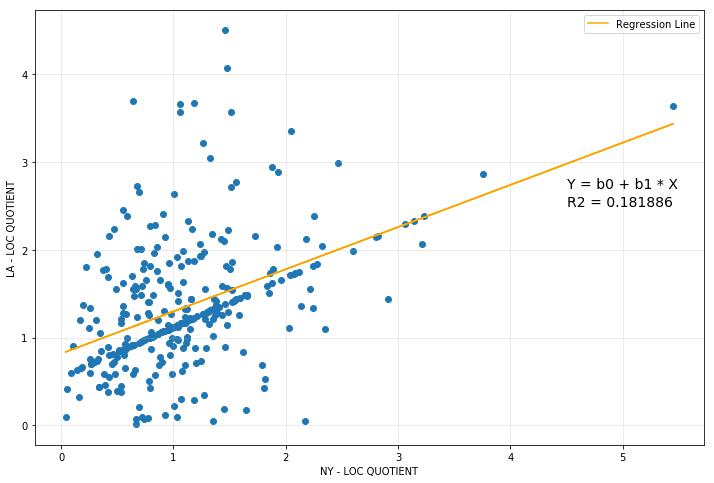

In [44]:
x=df_q2['NY - LOC QUOTIENT']
y=df_q2['LA - LOC QUOTIENT']

plt.figure(figsize=(12,8))

plt.scatter(x,y)
plt.plot(x,intercept+slope*x,color='orange')

plt.text(4.5,2.7,'Y = b0 + b1 * X',fontsize=14)
plt.text(4.5,2.5,'R2 = 0.181886',fontsize=14)

plt.xlabel('NY - LOC QUOTIENT')
plt.ylabel('LA - LOC QUOTIENT')
plt.legend(['Regression Line'])
plt.grid(alpha=0.3)

3.Use the calculated slope and intercept calculate the predicted Y values and the residuals.

In [160]:
pred_y=df_q2['NY - LOC QUOTIENT']*slope+intercept
residuals=df_q2['LA - LOC QUOTIENT']-pred_y

q2_pred=pd.DataFrame({'Predicted LA - LOC QUOTIENT':pred_y,
                     ' Residuals':residuals},
                    index=range(324))

q2_pred.head(10)

,Predicted LA - LOC QUOTIENT,Residuals
0,1.119166,-0.209166
1,1.316205,0.103795
2,1.253730,1.156270
3,1.594944,-0.764944
4,1.359458,0.970542
5,1.513245,0.586755
6,1.393099,-0.683099
7,1.465186,-1.415186
8,1.465186,-0.255186
9,1.071108,0.138892


4.Calculate the Residuals Mean, Residuals SD, Residuals Minimum, Residuals Maximum and Residuals Count.

In [162]:
r_des=pd.DataFrame({'Value':residuals.describe()})
r_des

,Value
count,3.240000e+02
mean,-2.395203e-16
std,6.587033e-01
min,-1.809265e+00
25%,-2.530979e-01
50%,-1.591179e-01
75%,2.460270e-01
max,2.981950e+00


5.Perform the procedure for creating a normal probability plot of the residuals.

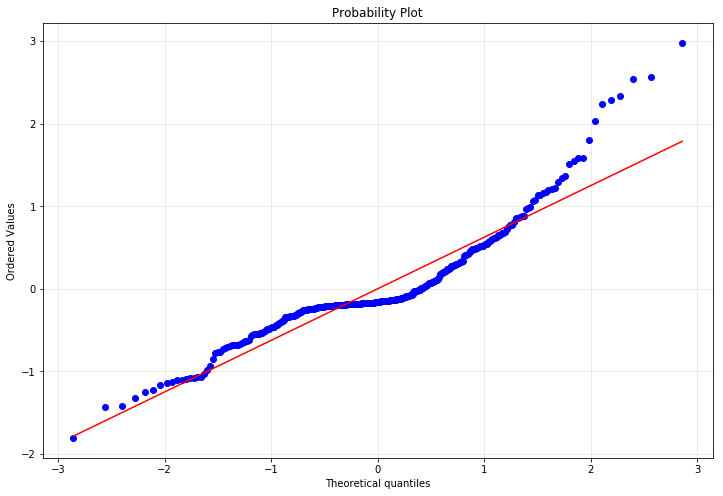

In [147]:
plt.figure(figsize=(12,8))

x=residuals
stats.probplot(x, plot=plt)
plt.grid(alpha=0.3)

plt.show()

6.Check the independency of the residuals graphically.        
7.Check the homoscedasticity of the residuals graphically.     

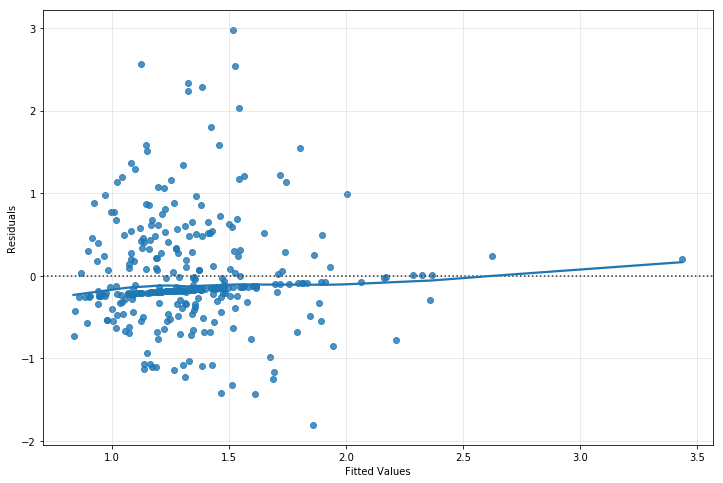

In [152]:
plt.figure(figsize=(12,8))

x=pred_y
y=residuals
sns.residplot(x, y,lowess=True)

plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.grid(alpha=0.3)

8.Construct a frequency distribution of the residuals consisting of 18 bins.

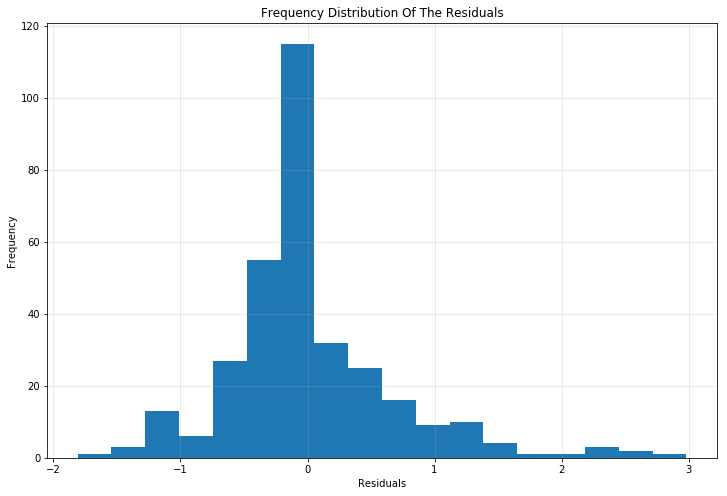

In [74]:
plt.figure(figsize=(12,8))

x=residuals
plt.hist(x,bins=18)

plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Frequency Distribution Of The Residuals')
plt.grid(alpha=0.3)

9.Then use the Chisquared Goodness of Fit test to test the normality of the residuals.

In [132]:
#x=residuals
#k2, p = stats.normaltest(x)

#Ho:the distribution of the residuals is a normal distribution.
#Ha:the distribution of the residuals differs from a normal distribution.
residuals=pd.DataFrame(residuals)
ob_c1=residuals[residuals<=-1].count()[0]
ob_c2=residuals[(-1<residuals) & (residuals<=0)].count()[0]
ob_c3=residuals[(0<residuals) & (residuals<=1)].count()[0]
ob_c4=residuals[(1<residuals) & (residuals<=2)].count()[0]
ob_c5=residuals[residuals>2].count()[0] 

ob_c=[ob_c1,ob_c2,ob_c3,ob_c4,ob_c5]

In [131]:
normal_p=[0.1587,0.3413,0.3413,0.1359,0.0228]
ex_c=[]
for p in normal_p:
    ex_c.append(p*324)


In [134]:
chi=[]
for i in range(5):
    chi.append(((ob_c[i]-ex_c[i])**2)/ex_c[i])

test_r=pd.DataFrame({'Class Left End':['-',-1,0,1,2],
                    'Class Right End':[-1,0,1,2,'-'],
                    'Class Midpoint':['-',-0.5,0.5,1.5,'-'],
                    'Observed Frequency':ob_c,
                    'Normal Probabilities':normal_p,
                    'Expected Frequency':ex_c,
                    '(Observed - Expected)2 / Expected':chi},
                   index=range(5))

test_r

,Class Left End,Class Right End,Class Midpoint,Observed Frequency,Normal Probabilities,Expected Frequency,(Observed - Expected)2 / Expected
0,-,-1,-,17,0.1587,51.4188,23.039312
1,-1,0,-0.5,196,0.3413,110.5812,65.982024
2,0,1,0.5,87,0.3413,110.5812,5.028640
3,1,2,1.5,17,0.1359,44.0316,16.595068
4,2,-,-,7,0.0228,7.3872,0.020295


In [139]:
#significance level=0.05 
chi_test_r=pd.DataFrame({'Value':[sum(chi),5-1-2,'<0.00001','Reject Ho']},
                   index=['χ2','DF','P-value','Decision'])

chi_test_r

,Value
χ2,110.665
DF,2
P-value,<0.00001
Decision,Reject Ho
